# <center>Digital Image Processing - Problem Set 4</center>

### Student Names: 
Jorge Ortega, Sebastian Salas, Katerine Vera

### Instructions

['crosses', 'noisy_fingerprint', 'chessboard', 'cameraman', 'flower', 'moon', 'sudoku', 'fingerprint', 'spheres', 'building', 'small_blobs', 'steve_blog']
['mms', 'connected']


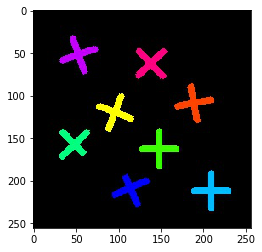

In [116]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir, path
import random
%matplotlib inline

pathGray  = "ima/gray"
pathColor = "ima/color"

FilesGray  =  listdir(pathGray)
FilesColor = listdir(pathColor)

grayKeys   = []
colorKeys  = []

files = {
    "gray" :{ },
    "color":{ }
}

for i in FilesGray:
    key = i.split(".")[0]
    if key != "":
        grayKeys.append(key)
        files["gray"][key] = cv2.imread(pathGray + "/" + i, cv2.IMREAD_GRAYSCALE)

for i in FilesColor:
    key = i.split(".")[0]
    if key != "":
        colorKeys.append(key)
        temp = cv2.imread(pathColor + "/" + i, cv2.IMREAD_COLOR)
        files["color"][key] = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    
print(grayKeys)
print(colorKeys)

plt.imshow(files["color"]["connected"])
plt.show() 



temp = None
FilesGray  = None
FilesColor = None

def fRGB2HSIt(img,flag):   #Funcion para pasar de RGB a HSI
    height,widht,_= img.shape        #se obtienen las dimensiones de la imagen
    
    H=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la matiz
    S=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la saturacion
    I=np.zeros((height,widht))       #se crea una matriz de ceros con las dimensiones de la imagen para la intensidad
    
    nImg = np.zeros(img.shape)
    nImg = cv2.normalize(img,nImg,0.0,1.0,cv2.NORM_MINMAX,cv2.CV_32FC1)
    R,G,B = cv2.split(nImg)

    
    pt = (R-G) + (R-B)
    pb = 1e-34 + ((    ((R-G)**2)    +    ((R-B)*(G-B))    )**0.5) 

    H = np.rad2deg(np.arccos(0.5* ( pt/pb )))  
    H = np.uint16(H+((360-H)*np.uint32(B>G)))
    H = cv2.normalize(H,H,0,1,cv2.NORM_MINMAX,cv2.CV_32FC1)
    
    S = 1 - ( ( 3*  (np.minimum(R,G,B)) ) / (R+G+B) )

    I = (1/3)*(R+G+B)

    if flag == 0:
        return [H,S,I]
    else:
        return HSI_Merged = cv2.merge([H,S,I])


This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


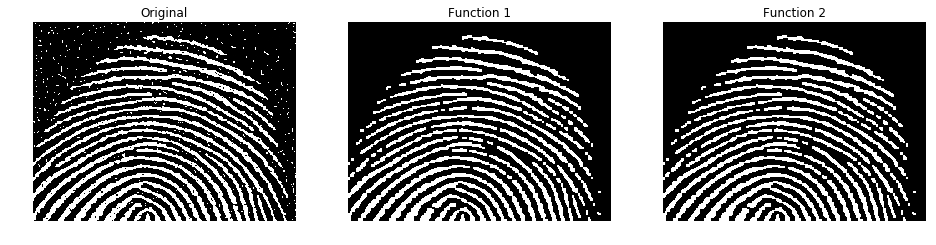

In [199]:
%matplotlib inline
def funct1(img):
    sq=np.ones((3,3))
    img_p=cv2.erode(img,sq)
    img_p=cv2.dilate(img_p,sq,iterations = 2)
    img_p=cv2.erode(img_p,sq)
    return img_p

def funct2(img):
    sq2=np.ones((3,3))
    img_o=cv2.morphologyEx(img,cv2.MORPH_OPEN,sq2)
    img_c=cv2.morphologyEx(img_o,cv2.MORPH_CLOSE,sq2)
    return img_c

img=files["gray"]["noisy_fingerprint"]
img1=funct1(img)
img2=funct2(img)

plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(img1,cmap="gray")
plt.axis("off")
plt.title("Function 1")

plt.subplot(1,3,3)
plt.imshow(img2,cmap="gray")
plt.axis("off")
plt.title("Function 2")

plt.show()

## Conclusiones
Aqui podemos observar como ambos proceso en las funciones arrojan los mismos resultados debido a que en realidad son las mismas operaciones. En clase observamos que la operacion "opening" es realizar una erosion y luego una dilatacion al resultaod de la erosion. Estas fueron las operaciones que se realizaron en ambas funciones primero. Luego vemos que en la primera funcion se realiza una segunda dilatacion y luego una erosion, que segun lo aprendido en clase es una operacion de "closing" y estaa es la operacion realizada en la funcion 2. De esto se puedo concluir que efectivamente en ambas imagenes se aplicaron las mismas operaciones y en el mismo orden.

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [3]:
%matplotlib inline
# wx, gtk, osx or tk


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


/home/kenshinn/Documents/Proyects/Python/PDI/pdivenv/lib/python3.5/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


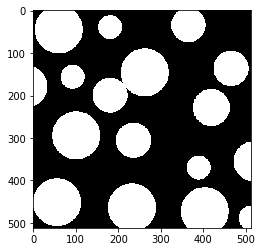

In [4]:
%matplotlib tk
def fill(img,pix):
    data=img.copy()
    X_k=np.zeros(img.shape).astype(np.uint8)
    X_k[int(round(pix[0][1])),int(round(pix[0][0]))]=255
    sq=255*np.ones((3,3))
    sq=sq.astype(np.uint8)
    A_c=(255-data)
    conti = True
    while conti:
        X_p=X_k.copy()
        X_k=cv2.dilate(X_p,sq,iterations=1)
        X_k=np.bitwise_and(X_k,A_c)
        conti=not(np.array_equal(X_k,X_p))

    total=np.bitwise_or(X_k,data)
    return total

img=files["gray"]["spheres"]
figure=plt.figure()
plt.imshow(img,cmap="gray")
try:
    pix=plt.ginput(1)
except Exeption:
    pass

img_filled=fill(img,pix)
plt.imshow(img_filled,cmap="gray")
plt.show()
for i in range(16):
    pix=plt.ginput(1)
    img_filled=fill(img_filled,pix)
    plt.imshow(img_filled,cmap="gray")
    plt.show()
    

## Conlcusiones
En este codigo se usa la función plt.ginput para obtener el pixel donde se quiere rellenar el circulo. Esta función da los puntos en x,y por lo cual se debe tener en cuenta a la hora de tomar el punto correcto de la imagen pues en las matrices se trabaja con y,x. posterior se usa la formula dada para rellenar el circulo la cual consiste en una dilatación continua al punto donde se marco y se le realiza una interseccion con el resultado de la dilatacion. la intersección se realiza con el comando np.bitwise_and. Finalmente hasta que el resultado de la dilatacion no presente varianza se reliza dicha operacion. Con el fin de rellenar todos los circulos se hace un for con el numero de circulos a rellenar en la imagen.

## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="crosses.png"/>
<img src="connected.jpg"/>

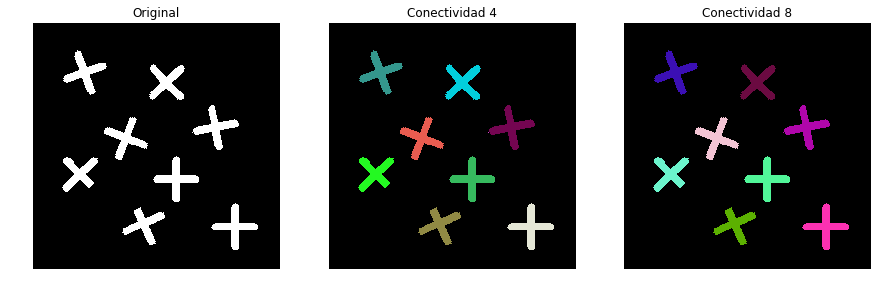

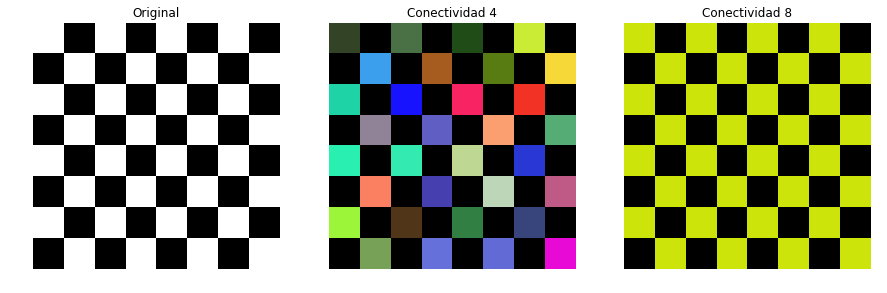

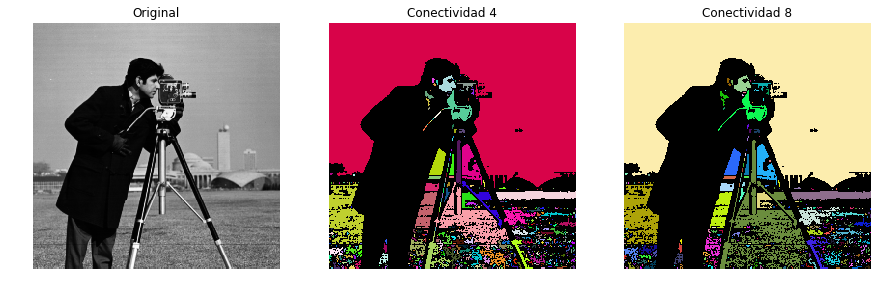

In [353]:
%matplotlib inline

def labelConnectedComponents(imgt, adjacency):
    # Se recive la imagen y el tipo de adjacencia
    _, img = cv2.threshold(imgt,127,255,cv2.THRESH_BINARY)
    end = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    h,w = img.shape
    mask = np.zeros((h+2, w+2), np.uint8) 
    space = np.stack(np.where(img==255),axis=1) # se bucsa los indices de las zonas blancas en la imagen
    for i in space:
        color = (random.randint(0,255), random.randint(0,255), random.randint(0,255)) # id aleatorio del elemento
        cv2.floodFill(end, mask, (i[1],i[0]), color, flags = adjacency) # se indunda en el area selecionada
    return end # Imagen con los marcada con los ids

pics = [files["gray"]["crosses"].copy(), files["gray"]["chessboard"].copy(), files["gray"]["cameraman"].copy()]
con = [4, 8]

# Se muestran los resultados
for img in pics:
    plt.figure(figsize=(15,15))
    acc = 1
    plt.subplot(1,len(con)+1,acc)
    plt.title("Original")
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    acc=acc+1
    for conectivity in con:
        plt.subplot(1,len(con)+1,acc)
        plt.title("Conectividad "+str(conectivity))
        plt.imshow(labelConnectedComponents(img, conectivity)) # se aplica la funcion
        plt.axis("off")
        acc=acc+1
    plt.show()

### Función "labelConnectedComponents()"

Para resolver el punto, se creó una funcion labelConnectedComponents, la cual toma como parametros la imagen a analizar y el tipo de conectividad a tener en cuenta. La imagen no nesesariamente debe ser binaria, puesto que la funcion se encarga de convertirla con la funcion cv2.threshold().

Se utiliza la funcion np.where() para buscar los indices de los pixeles blancos de la imagen. Despues se utiliza  la función cv2.floodFill() para llenar todos los puntos conectados a esta siguendo el criterio de adjacencia.

### Resultados

Se probó este metodo en las imagenes mostradas en la parte de arriba y se obtuvo que cuando los objetos a identificar estan muy separados, como en la imagen "crosses", no importa si se usa conectividad 4 o 8 porque la vencindad del pixel en los bodes simepre sera negro, por lo que siempre seran identificados por separado.

En el caso de la imagen "chessboard", en las esquinas de los cuadrados del tablero la conectividad 8 hace contacto con los cuadrados diagonales por lo que al ser llenados, los cuadros blancos son identificados como un solo elemento.

---------------------------------------------------------------------------------------------------------------

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

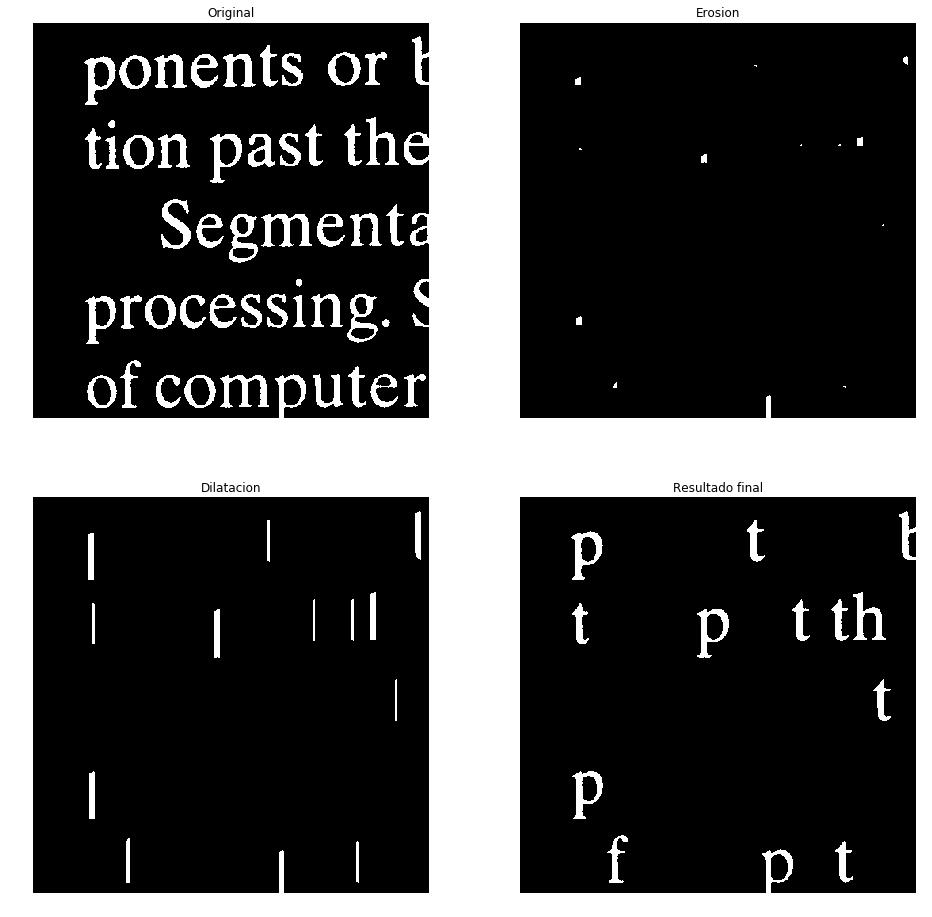

In [54]:
# Salesita
%matplotlib inline
bw=files["gray"]["steve_blog"]
sq=np.ones((51,1)).astype(np.uint8)
bw2=cv2.erode(bw,sq,iterations=1)
bw3=cv2.dilate(bw2,sq,iterations=1)
marker=cv2.erode(bw,sq)
img=bw.copy()
[h,w]=bw.shape
mask=np.zeros((h+2,w+2)).astype(np.uint8)
for i in range(h):
    for j in range(w):
        if (marker[i,j] > 0) :
            cv2.floodFill(img,mask,(j,i),0)

subs = bw - img
            
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(bw,cmap="gray")
plt.axis("off")
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(bw2,cmap="gray")
plt.axis("off")
plt.title("Erosion")

plt.subplot(2,2,3)
plt.imshow(bw3,cmap="gray")
plt.axis("off")
plt.title("Dilatacion")

plt.subplot(2,2,4)
plt.imshow(subs,cmap="gray")
plt.axis("off")
plt.title("Resultado final")

## Conclusión

Para crear este algoritmo se vió necesarió guiarse de la entrada del codigo en matlab. Se siguieron los mismos pasos para crear las mascaras y en el momento donde se hacía la reconstrucción de la imagen en matlab, en la entrada se explicaba que hacia la función imreconstruct usada en matlab. Esta realiza un floodfill en los lugares de los seedpoint. Entonces se tomoaron como seedpoints los pixeles donde la erosión arrojo pixeles en 1, deacuerdo a lo realizado en el programa de matlab. para esto se recorrió la matriz y donde los valores de la erosión era mayor que cero se aplicaba floodfill. Para esta función se asigno que los valores de floodfill fueran 0 para poder realizar una resta entre el resultado y la imagen original, y de esta manera las letras que no fueron afectas por el floodfill (las cortas) eran eliminadas de la imagen original. El uso de la funcion cv2.floodfill se baso en los siguientes links:

https://www.learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/
https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html

## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

De lo anterior se observa como el aumento del parametro del filtro gaussiano hacia perder detalles de los bordes en la imagen, suavizandola cada vez mas. Lo anterior afecta al detector de bordes canny. El metodo canny usa 2 umbrales para definir un borde, uno maximo y uno minimo, junto con el tamaño del kernel para el filtro. A medida que el tamaño del kernel y los umbrales (escogidos por tanteo) aumentaban, los resultados mostraron menos detalles de la imagen a través de los bordes. Es decir, menos bordes fueron detectados por el metodo canny.

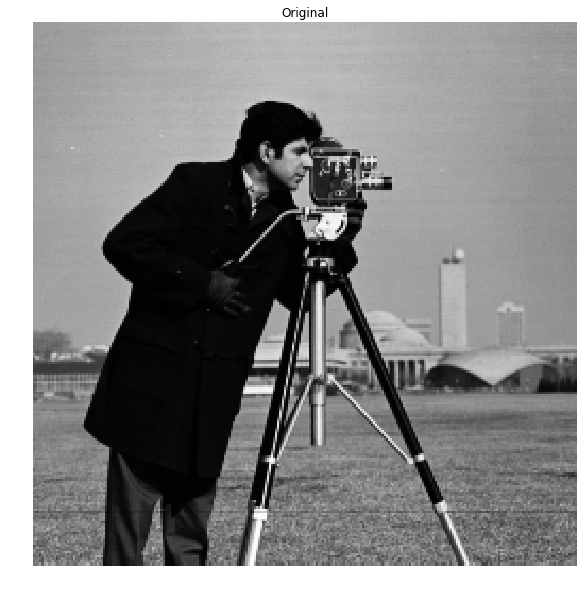

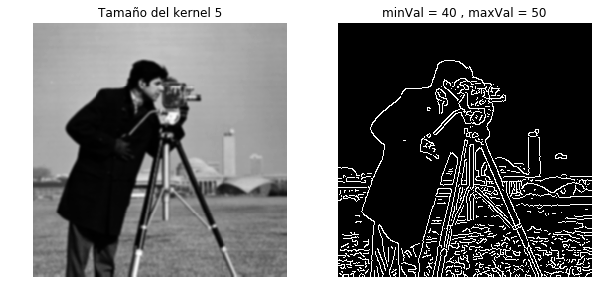

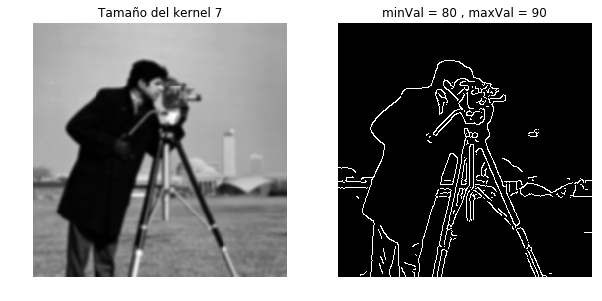

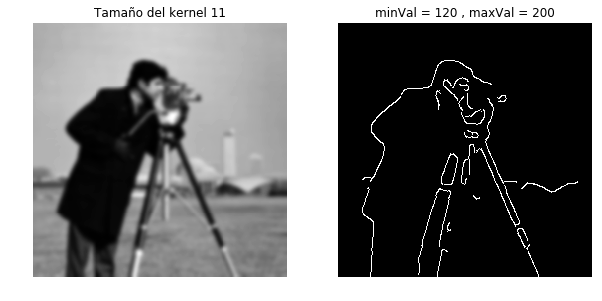

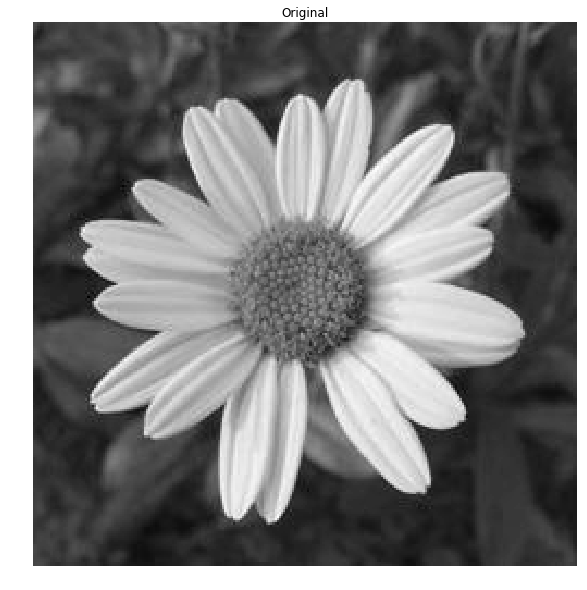

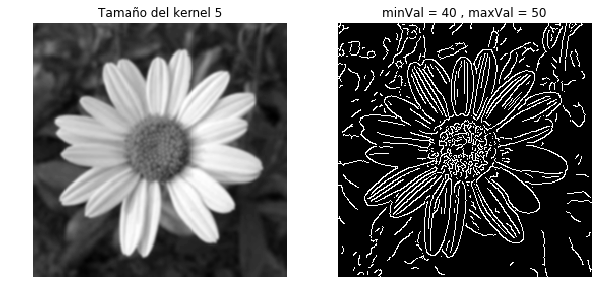

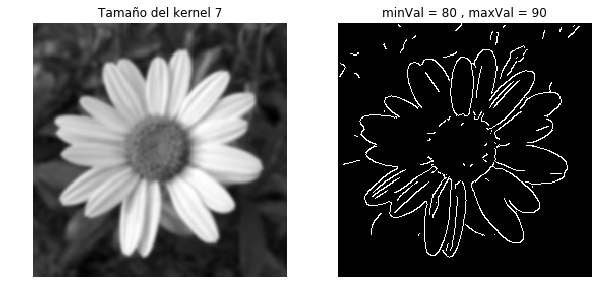

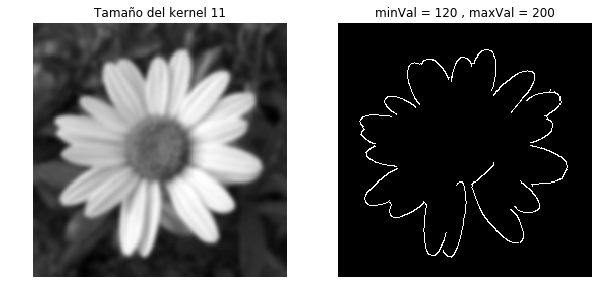

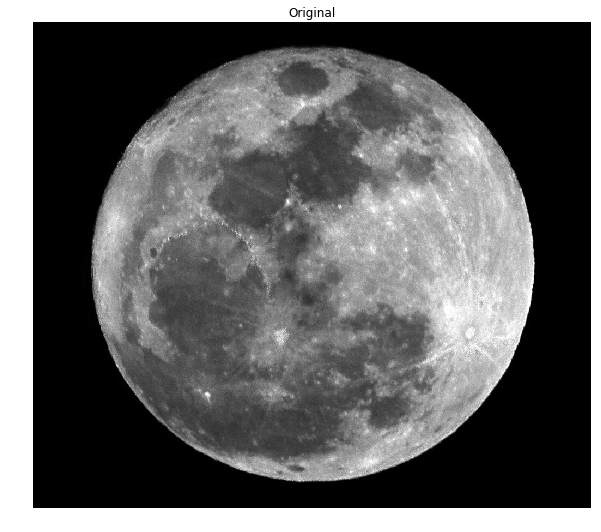

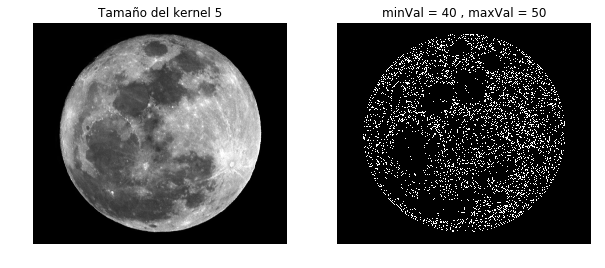

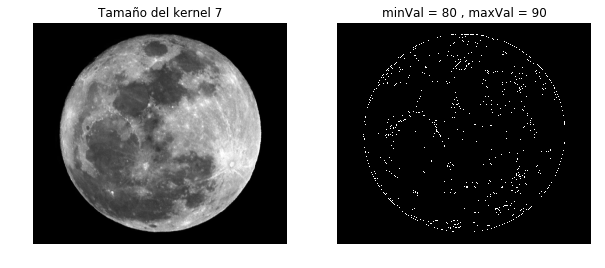

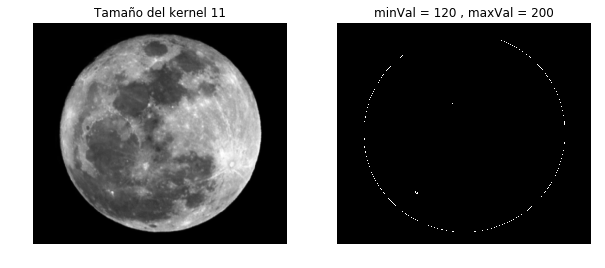

In [78]:
%matplotlib inline

def canny(img, lim_inf, lim_sup,kernel_sizes):  
    
    img_fil = cv2.GaussianBlur(img, (kernel_sizes,kernel_sizes),0) #funcion que aplica el filtro gausiano
    bordes = cv2.Canny(img_fil,lim_inf,lim_sup)                    #se utililza la funcion de opencv
    return bordes


values = [
    [5 ,  40,   50],
    [7 ,  80, 90],
    [11,  120, 200]
]


pics  = [files["gray"]["cameraman"], files["gray"]["flower"], files["gray"]["moon"]]


for img in pics:
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap="gray")
    plt.title("Original") 
    plt.axis("off")
    plt.show()
    for i in values:
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        plt.imshow(cv2.GaussianBlur(img,(i[0],i[0]),0),cmap="gray") 
        plt.axis("off")
        plt.title("Tamaño del kernel "+str(i[0]))

        plt.subplot(1,2,2)
        plt.imshow(canny(img,i[1],i[2],i[0]),cmap="gray") 
        plt.axis("off")
        plt.title("minVal = "+str(i[1])+" , maxVal = "+str(i[2]))
        plt.show()
    

De lo anterior se observa como el aumento del parametro del filtro gaussiano hacia perder detalles de los bordes en la imagen, suavizandola cada vez mas. Lo anterior afecta al detector de bordes canny. El metodo canny usa 2 umbrales para definir un borde, uno maximo y uno minimo, junto con el tamaño del kernel para el filtro. A medida que el tamaño del kernel y los umbrales (escogidos por tanteo) aumentaban, los resultados mostraron menos detalles de la imagen a través de los bordes. Es decir, menos bordes fueron detectados por el metodo canny.

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

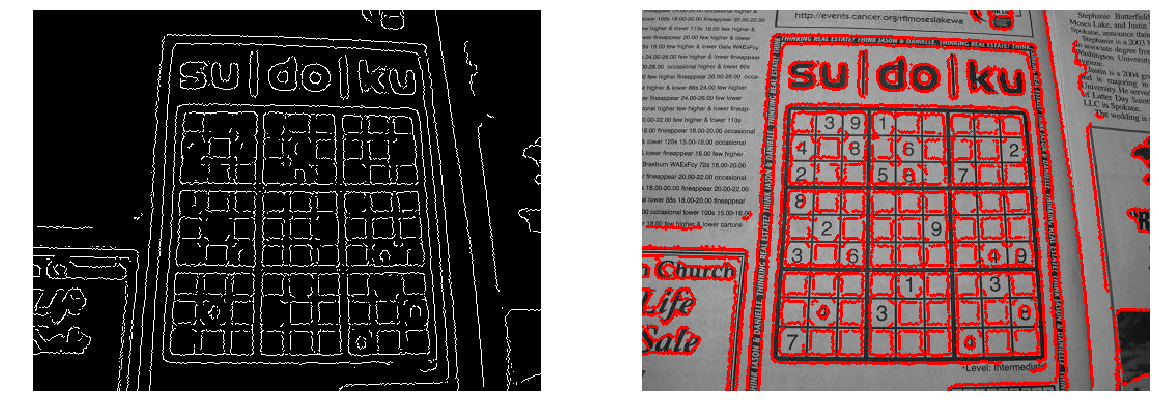

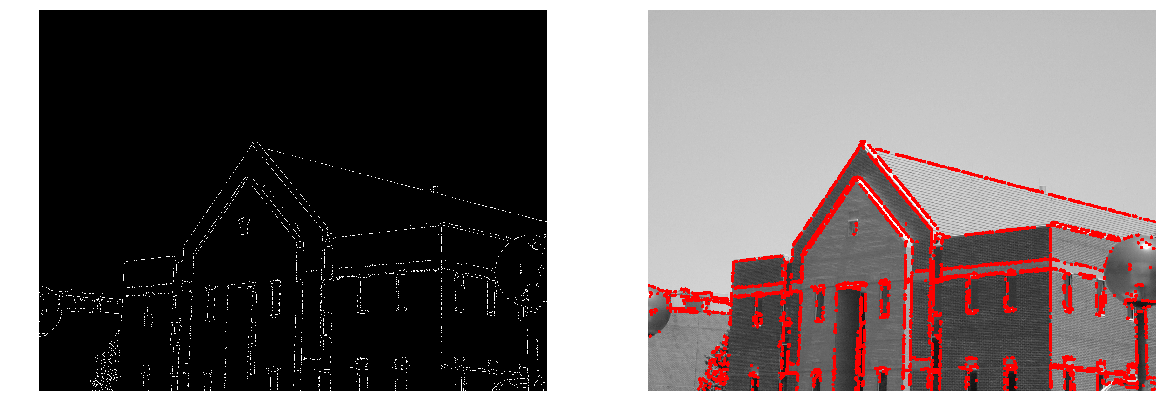

In [94]:
%matplotlib inline

def canny(img, lim_inf, lim_sup,kernel_sizes):  # Funcion para detectar bordes del punto 5
    img_fil = cv2.GaussianBlur(img, (kernel_sizes,kernel_sizes),0)
    bordes = cv2.Canny(img_fil,lim_inf,lim_sup)
    return bordes

def Hough(img, lim, kernel, ths, wid):
    # Funcion que aplica la transformada de Hough
    #
    # Como entrada se tiene la imagen, los limietes y el kernel apra la funcion canny()
    # y para la funcion cv2.HoughLinesP se tiene el tamaño minimo a detectar de una linea
    # por ulitmo el grosor con el que se dibujará
    #
    # Como salida esa la imagen con los bordes y la imagen con los bordes dibujados
    can = canny(img,lim[0],lim[1],kernel)
    lines = cv2.HoughLinesP(can,1,np.pi/180,ths) # Funcion para hallar los puntos de las lineas
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    try:
        for i in lines:
            for coor in i:
                cv2.line(img,(coor[0],coor[1]),(coor[2],coor[3]),(255,0,0),wid)
    except Exception :         # Puede que cv2.HoughLinesP no encuentre lineas
        print("No Lines")
        print(lines)
    can = cv2.cvtColor(can,cv2.COLOR_GRAY2RGB) # Se regresa a color par que se más visible el color de los
                                               # bordes encontrados
    return (can, img)
    
img = files["gray"]["sudoku"]

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
res = Hough(img,(25,35),23,0,2)
plt.imshow(res[0])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(res[1])
plt.axis("off")
plt.show()

img = files["gray"]["building"]

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
res = Hough(img,(10,20),23,45,10)
plt.imshow(res[0])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(res[1])
plt.axis("off")
plt.show()

### Funcion "Hough"
Esta funcion toma una imagen y la regresa con todas las lineas que pudo encontrar resaltadas en rojo. Primero aplica el metodo de Canny para encontrar todos los bordes, luego se pasa esta informacion a la función "cv2.HoughLinesP()", la cual saca coordenadas dos pares de cordenadas X y Y que representan la linea. Despues se dibuja con la función "cv2.line()". 

El parametro ths, el cual esta directamente relacionado con la funcion "cv2.HoughLinesP()", es utilizado para filtrar lineas muy pequeñas que a simple vista pueden parecer puntos. 

El parametro lim es una tupla que lleva los valores de limite superior e inferior del metodo Canny

El parametro kernel es el tamaño del kernel a utilizar para la funcion cv2.GaussianBlur()

### Resultados

Como se puede ver en las imagenes, se pueden obtener resultados satisfactorios ajustando los parametros de los limites del metodo "cv2.Canny" y el kernel del "cv2.GaussianBlur()". Entre mas pegados y de menor valor sean los limites superiores e inferiores, se obtendran más bordes en la deteccion. Entre mas grande sea el kernel aplicado, se borraran mas detalles que pueden causar falsos positivos en la deteccion de bordes y luego ser representados en la iamgen final.

Es nesesario jugar con estos valores para obtener un resultado satidfacorio. Se debe encontrar un balance entre cuantos bordes se quieren eliminar y que detalles se desean eliminar

---------------------

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


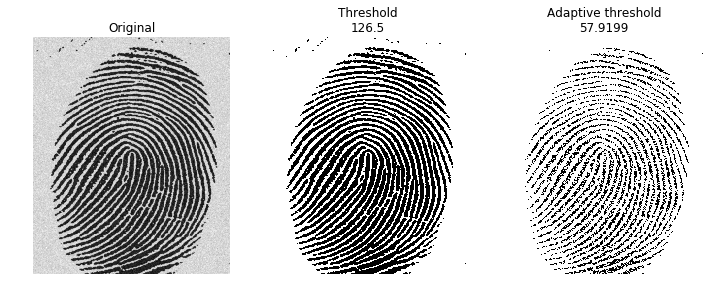

In [9]:
%matplotlib inline

def thr(img, To, tn): 
    h,w = img.shape
    count = 0
    while(abs(tn-To) > 0.5):   
        _, th = cv2.threshold(img,tn,255,cv2.THRESH_BINARY)
        u1 = np.mean(th*img)
        u2 = np.mean((255-th)*img)
        tn = (u1 + u2)/2 
        if count > 10:
            break
        count = count +1
    _, res = cv2.threshold(img,tn,255,cv2.THRESH_BINARY)      
    return res,tn

img  = files["gray"]["fingerprint"]
min_in = np.float64(np.min(img))
max_in = np.float64(np.max(img))
ti = (min_in + max_in)/2

# prueba con el umbral incial
_, pru = cv2.threshold(img,ti,255,cv2.THRESH_BINARY)

# prueba con la funcion
prueba, tn = thr(img, 25, ti)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(img,cmap="gray") 
plt.axis("off")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(pru,cmap="gray") 
plt.axis("off")
plt.title("Threshold\n"+ str(ti))

plt.subplot(1,3,3)
plt.imshow(prueba,cmap="gray") 
plt.axis("off")
plt.title("Adaptive threshold\n"+str(np.round(tn,4)))

plt.show()



De las imagenes anteriores, podemos resaltar que la imagen umbralizada con el primer parametro calculado ( valor inicial para T sería igual al promedio del valor de intensidad máximo y mínimo de la imagen) deja a vista detalles de la imagen puntos que son ruido, manteniendo el tamaño o grosor de los bordes sin destacar con mas detalle, la morfologia de la huella. Sin embargo, en la imagen final cuyo valor de umbralización fue determinada por la condición de iteración en los pasos 2-4, se eliminan esos ruidos y los detalles de la morfologia (definidida en las lineas) son resaltadas mayormente. 

## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


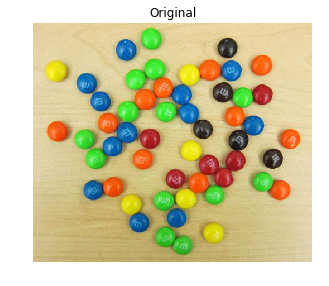

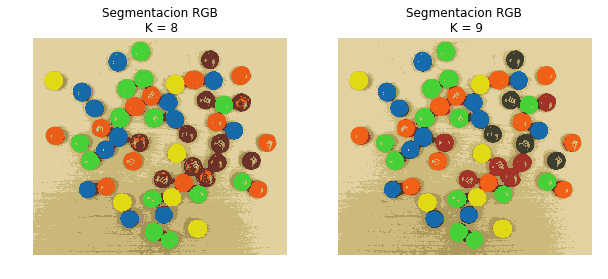

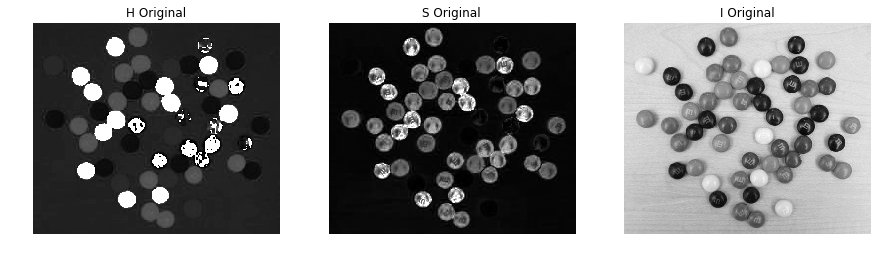

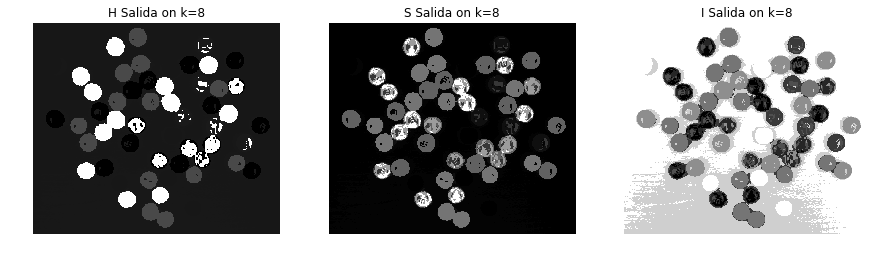

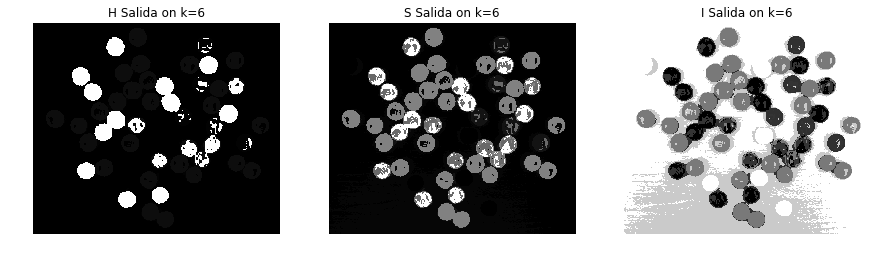

In [129]:
%matplotlib inline

def segmentor(img,k):
    # Funcion que implementa el algoritmo k-means para segmentacion
    # samples -> imagen a analizar
    # k     -> constante de para la funcion cv2.kmeans 
    # se regresa la imagen procesada y el histograma
    samples  = np.float32(img.copy().reshape(-1,3)) 
    criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 15, 1e-5) # calculo de criterio para cv2.means
    flag     = cv2.KMEANS_PP_CENTERS # flag

    compactness, labels, centers = cv2.kmeans(samples, k,None, criteria, 10, flag)
    centers = np.uint8(centers)[labels.flatten()]
    return centers.reshape(img.shape)

imgRGB = files["color"]["mms"].copy()
imgHSI = fRGB2HSIt(imgRGB,1)

H,S,I = cv2.split(imgHSI)

k1 = 8
imgOutHSI  = segmentor(imgHSI,k1)
Ho, So, Io = cv2.split(imgOutHSI)
k=6
imgOutHSI  = segmentor(imgHSI,k)
H1, S1, I1 = cv2.split(imgOutHSI)

plt.figure(figsize=(5,5))

plt.imshow(imgRGB)
plt.axis("off")
plt.title("Original")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(segmentor(imgRGB,8))
plt.axis("off")
plt.title("Segmentacion RGB\n K = "+str(8))

plt.subplot(1,2,2)
plt.imshow(segmentor(imgRGB,9))
plt.axis("off")
plt.title("Segmentacion RGB\n K = "+str(9))
plt.show()

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(H, cmap="gray")
plt.title("H Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(S, cmap="gray")
plt.title("S Original")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(I, cmap="gray")
plt.title("I Original")
plt.axis("off")

plt.show()


plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(Ho, cmap="gray")
plt.title("H Salida on k="+str(k1))
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(So, cmap="gray")
plt.title("S Salida on k="+str(k1))
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(Io, cmap="gray")
plt.title("I Salida on k="+str(k1))
plt.axis("off")

plt.show()


plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(H1, cmap="gray")
plt.title("H Salida on k="+str(k))
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(S1, cmap="gray")
plt.title("S Salida on k="+str(k))
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(I1, cmap="gray")
plt.title("I Salida on k="+str(k))
plt.axis("off")

plt.show()



### Función "segmentor"

Se encarga de realizar el algoritmo k-means para hacer una segmentación por colores. Toma dos parametros, la imagen y el valor de k. Primero se reorganiza los pixeles de la imagen en una sola matris horizontal en la cual cada elementeo es una matris RGB, esto para que pueda se procesada por la función "cv2.kmeans()". Despues se definen los criterios, numero de itraciones y flags de la funcion. Por ultimo se reorganiza la matris resultante y se entrega como parametro de salida.

### Resultados

Primero se utilizó la funcion en una imagen RGB tomando dos valores de K, los cuales son el 8 y el 9. Esto porque es el limite donde el algoritmo entrega una imagen con todos los colores de los M&Ms. En la imagen donde se aplicó la funcion con k=8, se ve que el no se puede diferenciar el color negro del rojo, mientras que con k=0 ya se nota la diferencia claramente. Aparte de esto los colores de los M&Ms se ven más uniformes, exceptuando las sombras y los brillos que tambien han sido reducidos.

Al aplicar la funcion a una imagen en escala HSI, se tiene que la saturacion y la intensidad son los más afectados con u K igual 8, pero el hue todavia alcansan a diferenciarse asi que se se tendria un resultado parecido al rgb con k=9. Tambien se ve que al disminuir k pierden la diferencia de colores en ciertos M&Ms por lo que es más parecido al rgb con k=8.

----------------------------------